# **Praktikum**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


In [ ]:
df = pd.read_csv('/content/gdive/MyDrive/Machine Learning Sem3/Praktikum13/Data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# drop kolom
df = df.drop(columns=['Cabin','Name', 'Ticket'], axis=1)

<Axes: >

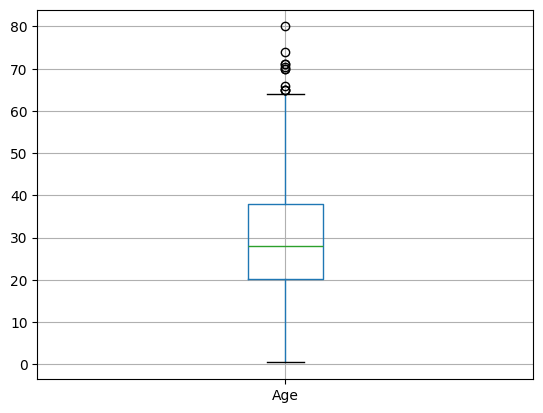

In [ ]:
df.boxplot(column='Age')

In [ ]:
df['Age' ]. fillna(df['Age' ].median(), inplace=True)

/tmp/ipython-input-3128608414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age' ]. fillna(df['Age' ].median(), inplace=True)


In [ ]:
# replacing the missing value in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

/tmp/ipython-input-2645773672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
replacements = {'Sex': {'male': 0, 'female': 1},
                'Embarked': {'S': 0, 'C': 1, 'Q':2}}

df.replace(replacements, inplace=True)

/tmp/ipython-input-249576572.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
#split data variabel X dan Y
X = df.drop('Survived', axis=1)
y = df['Survived' ]

In [ ]:
#transform data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

(712, 8)

In [ ]:
X_train.shape[1]

8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4909 - loss: 0.7151 - val_accuracy: 0.6294 - val_loss: 0.6679
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6270 - loss: 0.6867 - val_accuracy: 0.7063 - val_loss: 0.6453
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: 0.6652 - val_accuracy: 0.6923 - val_loss: 0.6237
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.6205 - val_accuracy: 0.7273 - val_loss: 0.6043
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 0.5976 - val_accuracy: 0.7133 - val_loss: 0.5832
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.5823 - val_accuracy: 0.7063 - val_loss: 0.5635
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.5847 - val_accuracy: 0.7273 - val_loss: 0.5483
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7523 - loss: 0.5442 - val_accuracy: 0.7483 - v

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss     :", loss)
print("Test Accuracy :", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8188 - loss: 0.3987 
Test loss     : 0.41289082169532776
Test Accuracy : 0.8044692873954773


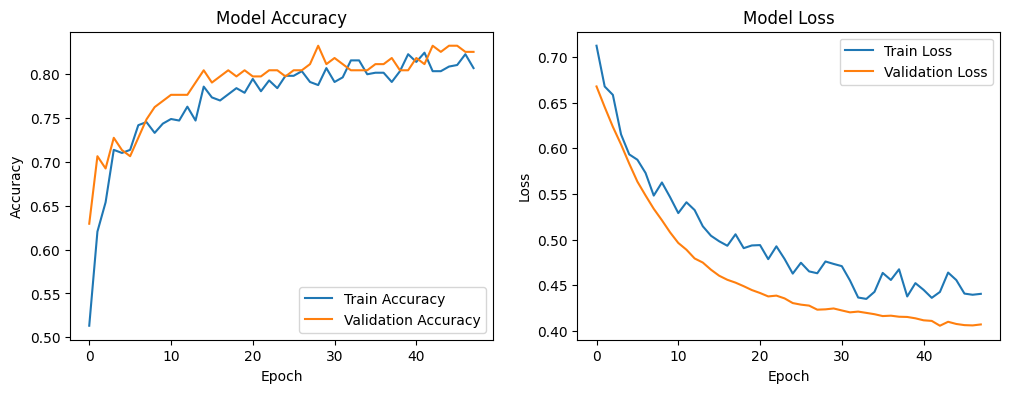

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy' ], label='Train Accuracy' )
plt.plot(history.history['val_accuracy' ], label='Validation Accuracy' )
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss' )
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Tugas**

In [ ]:
!pip install kaggle

**Load Data**

In [ ]:
kaggle = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

**Mengubah data gambar menjadi numerik**

In [ ]:
import cv2
import numpy as np
import os

IMG_SIZE = 28

data = []
labels = []

for digit in range(10):
    folder_path = f'/content/dataset/{digit}'
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = 255 - img

        data.append(img)
        labels.append(digit)

data = np.array(data)
labels = np.array(labels)

print(data.shape)
print(labels.shape)

(21555, 28, 28)
(21555,)


**Membagi data training dan data testing**

In [ ]:
data = data / 255.0
data = data.reshape(data.shape[0], -1)

print(data.shape)

(21555, 784)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=42,
)

**Preprocessing**

In [ ]:
from tensorflow.keras.utils import to_categorical

# ubah label menjadi one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Bentuk arsitektur ANN (MLP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# input layer dan hidden layer pertama
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

# dropout untuk cegah overfitting
model.add(Dropout(0.3))

# hidden layer kedua
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(BatchNormalization())

# output layer = jumlah kelas
model.add(Dense(10, activation='softmax'))

**Compile model**

In [ ]:
from tensorflow.keras.optimizers import Adam

# compile model untuk training
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,018 (949.29 KB)

 Trainable params: 242,890 (948.79 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

**Training model**

In [ ]:
# training ANN MLP
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1823 - loss: 2.4552 - val_accuracy: 0.4767 - val_loss: 1.9206 - learning_rate: 5.0000e-04
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3762 - loss: 1.8283 - val_accuracy: 0.5651 - val_loss: 1.4772 - learning_rate: 5.0000e-04
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4812 - loss: 1.5567 - val_accuracy: 0.6190 - val_loss: 1.2194 - learning_rate: 5.0000e-04
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5606 - loss: 1.3332 - val_accuracy: 0.6857 - val_loss: 1.0286 - learning_rate: 5.0000e-04
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6414 - loss: 1.1186 - val_accuracy: 0.7359 - val_loss: 0.8890 - learning_rate: 5.0000e-04
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6918 - loss: 0.9643 - val_accuracy: 0.7591 - val_loss: 0.7767 - learning_rate: 5.0000e-04
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

**Evaluasi**

In [ ]:
# evaluasi model di data testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.4553
Test Accuracy: 0.8703317046165466
Test Loss: 0.44547390937805176


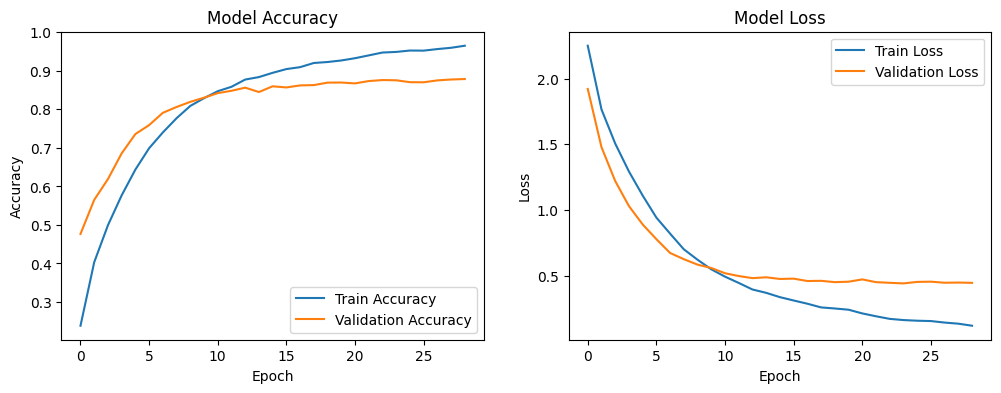

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy' )
plt.plot(history.history['val_accuracy' ], label='Validation Accuracy' )
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss' )
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()